IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
cf.go_offline()

In [3]:
movies_data = pd.read_csv("HighestGrossers.csv")
movies_data.head()

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978","4,23,06,002"
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608","6,92,69,062"
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943","5,46,07,854"
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808","9,45,24,324"
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749","8,47,32,942"


CLEANING THE DATA

In [4]:
movies_data['TOTAL FOR YEAR'] = movies_data['TOTAL FOR YEAR'].str.replace('$','')
movies_data['TOTAL IN 2019 DOLLARS'] = movies_data['TOTAL IN 2019 DOLLARS'].str.replace('$','')
movies_data['TOTAL IN 2019 DOLLARS'] = movies_data['TOTAL IN 2019 DOLLARS'].str.replace(',','')
movies_data['TICKETS SOLD'] = movies_data['TICKETS SOLD'].str.replace(',','')
movies_data['TOTAL FOR YEAR'] = movies_data['TOTAL FOR YEAR'].str.replace(',','')

C:\Users\gutti\AppData\Local\Temp/ipykernel_9516/4057000600.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\gutti\AppData\Local\Temp/ipykernel_9516/4057000600.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [5]:
movies_data

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,184031112,387522978,42306002
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,306169255,634504608,69269062
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,250650052,500207943,54607854
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,443319081,865842808,94524324
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,430443350,776153749,84732942
5,2000,How the Grinch Stole Christmas,Adventure,PG,Universal,253367455,430583644,47006948
6,2001,Harry Potter and the Sorcerer’s Stone,Adventure,PG,Warner Bros.,300404434,486166890,53074988
7,2002,Spider-Man,Adventure,PG-13,Sony Pictures,403706375,636480273,69484746
8,2003,Finding Nemo,Adventure,G,Walt Disney,339714367,516050346,56337374
9,2004,Shrek 2,Adventure,PG,Dreamworks SKG,441226247,650826473,71050925


In [6]:
movies_data['TICKETS SOLD']= movies_data['TICKETS SOLD'].astype(float)
movies_data['TOTAL FOR YEAR'] = movies_data['TOTAL FOR YEAR'].astype(float)  
movies_data['TOTAL IN 2019 DOLLARS']=movies_data['TOTAL IN 2019 DOLLARS'].astype(float)

PLOTTING

DISTRIBUTOR WISE AWARDS

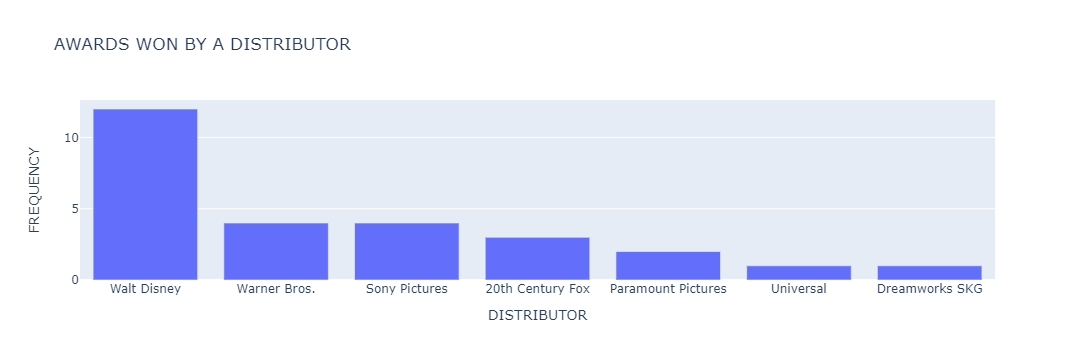

In [7]:
first_data = movies_data['DISTRIBUTOR'].value_counts()
first_graph_data = pd.DataFrame(dict(DISTRIBUTOR= first_data.index,FREQUENCY=first_data))
first_graph=px.bar(first_graph_data,x='DISTRIBUTOR',y='FREQUENCY',title='AWARDS WON BY A DISTRIBUTOR')
first_graph.show()

GENRE WISE AWARDS

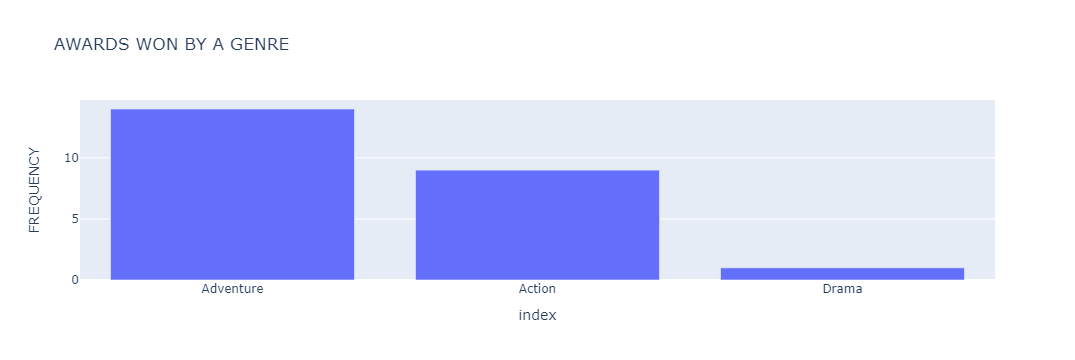

In [8]:
movies_data2= movies_data.dropna()
second_data_y = movies_data2['GENRE'].value_counts()
second_graph_data = pd.DataFrame(dict(GENRE=second_data_y.index,FREQUENCY=second_data_y))
second_graph = px.bar(second_graph_data,x=second_graph_data.index,y='FREQUENCY',title='AWARDS WON BY A GENRE')
second_graph.show()


DISTRIBUTOR VS TICKETS SOLD

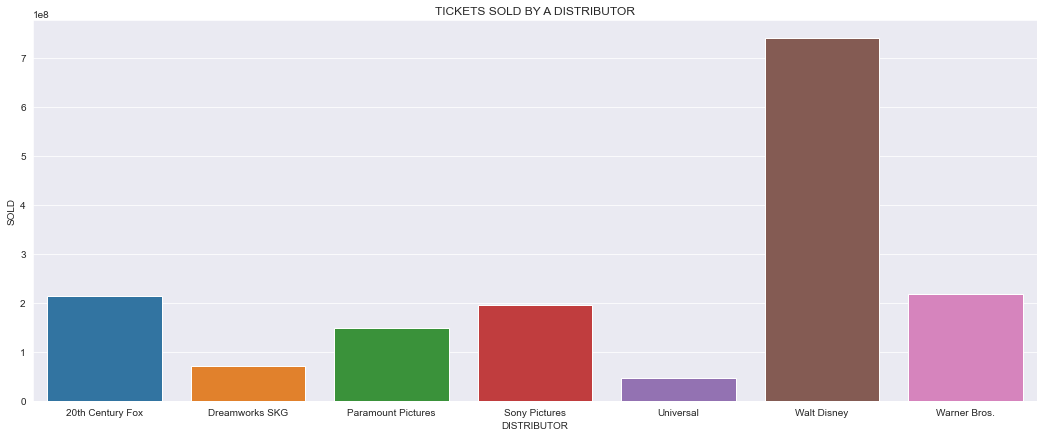

In [11]:
third_data = pd.DataFrame(dict(DISTRIBUTOR = movies_data['DISTRIBUTOR'], SOLD = movies_data['TICKETS SOLD']))
third_graph_data=third_data.groupby(['DISTRIBUTOR']).sum()
plt.figure(figsize=(18,7))
third_graph=sns.barplot(x=third_graph_data.index, y=third_graph_data['SOLD'])
plt.title('TICKETS SOLD BY A DISTRIBUTOR')
sns.set_style("darkgrid")

DISTRIBUTOR VS MONEY COLLECTED IN 2019

Text(0.5, 1.0, 'TOTAL MONEY EARNED BY A DISTRIBUTOR IN 2019')

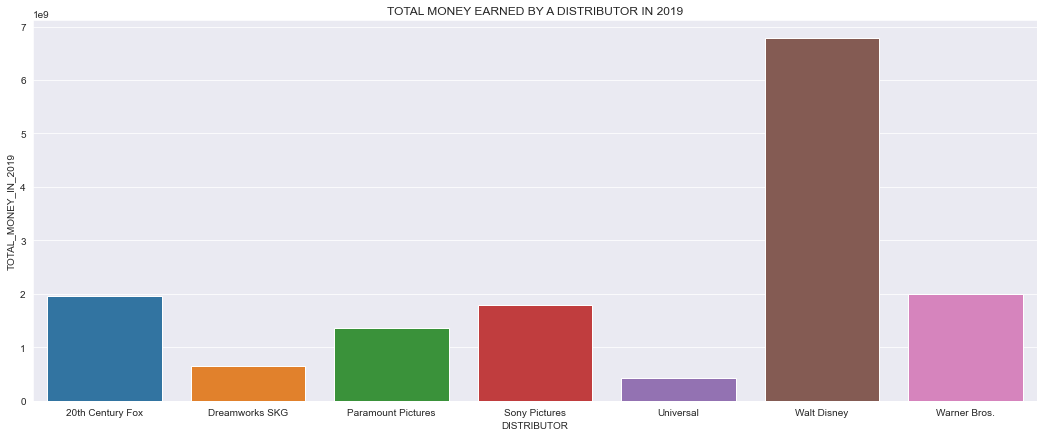

In [12]:
fourth_data = pd.DataFrame(dict(DISTRIBUTOR = movies_data['DISTRIBUTOR'], TOTAL_MONEY_IN_2019 = movies_data['TOTAL IN 2019 DOLLARS']))
fourth_graph_data=fourth_data.groupby(['DISTRIBUTOR']).sum()
plt.figure(figsize=(18,7))
fourth_graph=sns.barplot(x=fourth_graph_data.index, y=fourth_graph_data['TOTAL_MONEY_IN_2019'])
sns.set_style("darkgrid")
plt.title('TOTAL MONEY EARNED BY A DISTRIBUTOR IN 2019')

MPAA RATING VS AWARDS

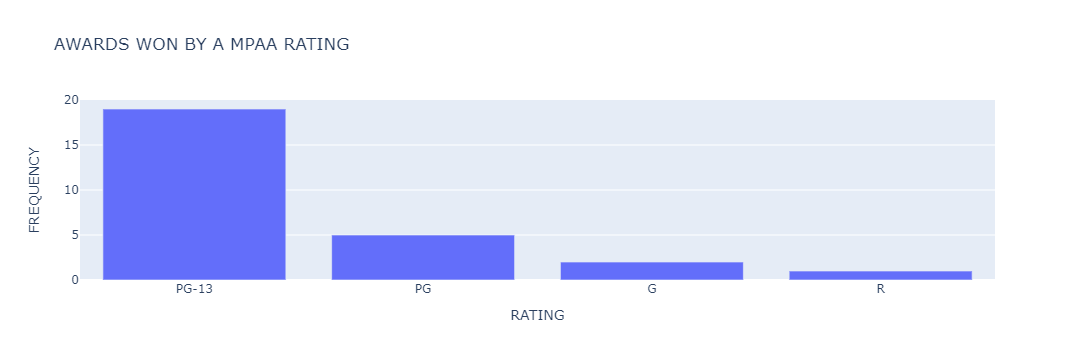

In [14]:
fifth_data = movies_data['MPAA RATING'].value_counts()
fifth_graph_data = pd.DataFrame(dict(RATING= fifth_data.index,FREQUENCY=fifth_data))
fifth_graph=px.bar(fifth_graph_data,x='RATING',y='FREQUENCY',title='AWARDS WON BY A MPAA RATING')
fifth_graph.show()

DISTRIBUTOR,GENRE VS TOTAL IN 2019

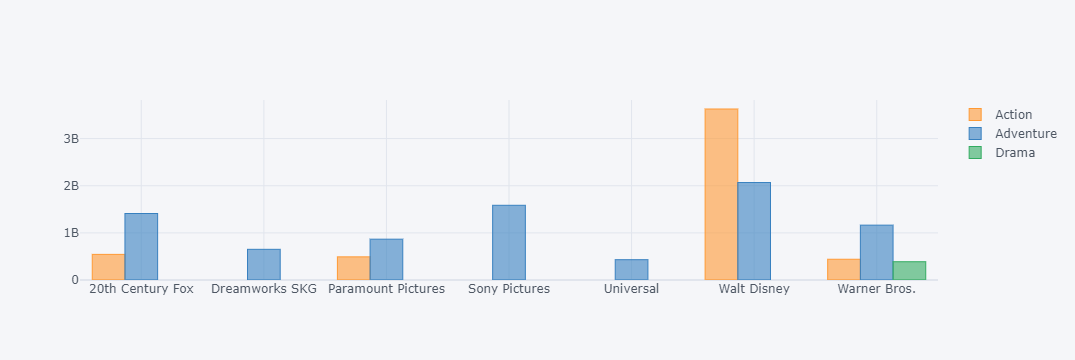

In [11]:
sixt_data = movies_data.groupby(by =['DISTRIBUTOR','GENRE'])['TOTAL IN 2019 DOLLARS'].sum().unstack().iplot(kind='bar')
# plt.figure(figsize=(18,7))

DISTRIBUTOR, GENRE VS TICKETS SOLD

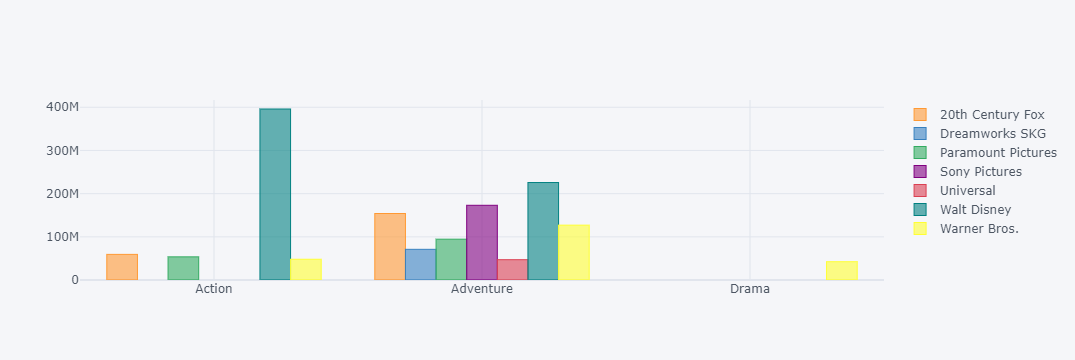

In [12]:
seventh_data = movies_data.groupby(by=['GENRE','DISTRIBUTOR'])['TICKETS SOLD'].sum().unstack().iplot(kind='bar')

HIGHEST GROSSING MOVIE EACH YEAR

In [13]:
eight_data = pd.DataFrame(dict(year=movies_data['YEAR'],movie=movies_data['MOVIE']))
print(eight_data)

    year                                          movie
0   1995                                 Batman Forever
1   1996                               Independence Day
2   1997                                   Men in Black
3   1998                                        Titanic
4   1999            Star Wars Ep. I: The Phantom Menace
5   2000                 How the Grinch Stole Christmas
6   2001          Harry Potter and the Sorcerer’s Stone
7   2002                                     Spider-Man
8   2003                                   Finding Nemo
9   2004                                        Shrek 2
10  2005         Star Wars Ep. III: Revenge of the Sith
11  2006     Pirates of the Caribbean: Dead Man’s Chest
12  2007                                   Spider-Man 3
13  2008                                The Dark Knight
14  2009            Transformers: Revenge of the Fallen
15  2010                                    Toy Story 3
16  2011  Harry Potter and the Deathly Hallows: 